In [2]:
# 캘리포니아 주택 가격 데이터로 함수형 유연한 모델 생성
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Concatenate
import matplotlib.pyplot as plt

housing = fetch_california_housing()
print(housing.keys())
print(housing.data[:3], type(housing.data)) # numpy.ndarray
print(housing.target[:3], type(housing.target)) # numpy.ndarray
print(housing.feature_names)
print(housing.target_names)
print(housing.data.shape) # (20640, 8)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]] <class 'numpy.ndarray'>
[4.526 3.585 3.521] <class 'numpy.ndarray'>
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']
(20640, 8)


In [3]:
# train / test
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=12)
print(x_train_all.shape, x_test.shape, y_train_all.shape, y_test.shape)

# train : train / validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, test_size=0.3, random_state=12)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

# 표준화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)


(16512, 8) (4128, 8) (16512,) (4128,)
(11558, 8) (4954, 8) (11558,) (4954,)


In [4]:
# Sequential API - 단순한 방법으로 Multi Layer Perceptron
model = Sequential()
model.add(Input(shape=x_train.shape[1:]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), verbose=2)

print('evalutate :', model.evaluate(x_test, y_test, verbose=0))

# test 일부 자료로 예측
x_new = x_test[:3]
y_pred = model.predict(x_new)

print('예측값 :', y_pred.ravel())
print('실제값 :', y_test[:3])

2025-09-13 15:22:46.091568: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-13 15:22:46.091608: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-13 15:22:46.091619: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-13 15:22:46.091655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-13 15:22:46.091672: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20


2025-09-13 15:22:46.497762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


362/362 - 3s - 9ms/step - loss: 2.6484 - mse: 2.6484 - val_loss: 1.3397 - val_mse: 1.3397
Epoch 2/20
362/362 - 2s - 6ms/step - loss: 1.2050 - mse: 1.2050 - val_loss: 1.5043 - val_mse: 1.5043
Epoch 3/20
362/362 - 2s - 6ms/step - loss: 1.6791 - mse: 1.6791 - val_loss: 1.3644 - val_mse: 1.3644
Epoch 4/20
362/362 - 2s - 6ms/step - loss: 1.6186 - mse: 1.6186 - val_loss: 1.1295 - val_mse: 1.1295
Epoch 5/20
362/362 - 2s - 6ms/step - loss: 1.0987 - mse: 1.0987 - val_loss: 0.9553 - val_mse: 0.9553
Epoch 6/20
362/362 - 2s - 6ms/step - loss: 1.0514 - mse: 1.0514 - val_loss: 0.7159 - val_mse: 0.7159
Epoch 7/20
362/362 - 2s - 6ms/step - loss: 0.7992 - mse: 0.7992 - val_loss: 0.6350 - val_mse: 0.6350
Epoch 8/20
362/362 - 2s - 6ms/step - loss: 0.6753 - mse: 0.6753 - val_loss: 0.6011 - val_mse: 0.6011
Epoch 9/20
362/362 - 2s - 6ms/step - loss: 0.6324 - mse: 0.6324 - val_loss: 0.5686 - val_mse: 0.5686
Epoch 10/20
362/362 - 2s - 6ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.5655 - val_mse: 0.5655


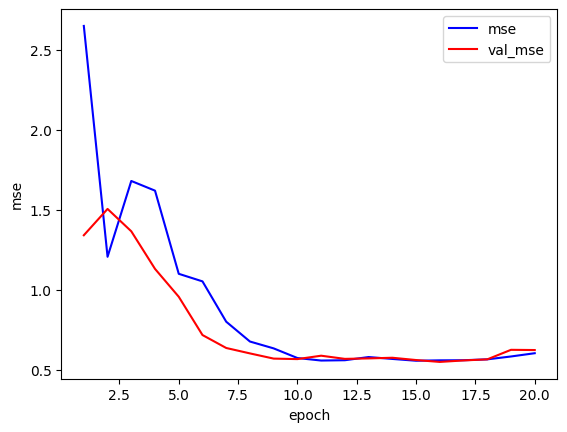

In [5]:
# 시각화
plt.plot(range(1, 21), history.history['mse'], 'b', label='mse')
plt.plot(range(1, 21), history.history['val_mse'], 'r', label='val_mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.show()

Epoch 1/20
362/362 - 3s - 9ms/step - loss: 2.5014 - mse: 2.5014 - val_loss: 1.0428 - val_mse: 1.0428
Epoch 2/20
362/362 - 3s - 7ms/step - loss: 1.0897 - mse: 1.0897 - val_loss: 1.2490 - val_mse: 1.2490
Epoch 3/20
362/362 - 3s - 7ms/step - loss: 1.3324 - mse: 1.3324 - val_loss: 0.6540 - val_mse: 0.6540
Epoch 4/20
362/362 - 3s - 7ms/step - loss: 0.6521 - mse: 0.6521 - val_loss: 0.6999 - val_mse: 0.6999
Epoch 5/20
362/362 - 3s - 8ms/step - loss: 0.7686 - mse: 0.7686 - val_loss: 2.1339 - val_mse: 2.1339
Epoch 6/20
362/362 - 3s - 7ms/step - loss: 1.0677 - mse: 1.0677 - val_loss: 1.0780 - val_mse: 1.0780
Epoch 7/20
362/362 - 3s - 8ms/step - loss: 0.5704 - mse: 0.5704 - val_loss: 0.9132 - val_mse: 0.9132
Epoch 8/20
362/362 - 3s - 7ms/step - loss: 1.2670 - mse: 1.2670 - val_loss: 0.5587 - val_mse: 0.5587
Epoch 9/20
362/362 - 3s - 7ms/step - loss: 0.5745 - mse: 0.5745 - val_loss: 0.7292 - val_mse: 0.7292
Epoch 10/20
362/362 - 3s - 7ms/step - loss: 2.2438 - mse: 2.2438 - val_loss: 0.9688 - val_m

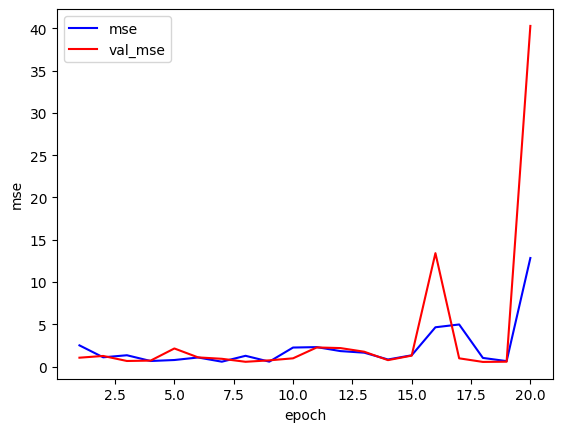

In [7]:
# Functional API - 유연한 MLP
input_ = Input(shape=x_train.shape[1:])
net1 = Dense(32, activation='relu')(input_)
net2 = Dense(32, activation='relu')(net1)
concat = Concatenate()([input_, net2]) # 입력층과 마지막 층을 concatenate했다
output = Dense(1)(concat)

model2 = Model(inputs=[input_], outputs=[output])

model2.compile(optimizer='adam', loss='mse', metrics=['mse'])
history2 = model2.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), verbose=2)

# test 일부 자료로 예측
x_new = x_test[:3]
y_pred = model2.predict(x_new)

print('예측값 :', y_pred.ravel())
print('실제값 :', y_test[:3])

# 시각화
plt.plot(range(1, 21), history2.history['mse'], 'b', label='mse')
plt.plot(range(1, 21), history2.history['val_mse'], 'r', label='val_mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.show()

Epoch 1/20
362/362 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 2.0637 - mse: 2.0637 - val_loss: 1.0594 - val_mse: 1.0594
Epoch 2/20
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0447 - mse: 1.0447 - val_loss: 0.9510 - val_mse: 0.9510
Epoch 3/20
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.1381 - mse: 1.1381 - val_loss: 0.6187 - val_mse: 0.6187
Epoch 4/20
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.7929 - mse: 0.7929 - val_loss: 0.8617 - val_mse: 0.8617
Epoch 5/20
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6483 - mse: 0.6483 - val_loss: 0.5648 - val_mse: 0.5648
Epoch 6/20
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9669 - mse: 0.9669 - val_loss: 1.5631 - val_mse: 1.5631
Epoch 7/20
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6485 - mse: 0.6485 - val_loss: 0.5691 - val_mse: 0.5691
Epoch 8/20
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6384 - mse: 0.6384 - val_loss: 2.0123 - val_mse: 2.0123
Epoch 9/20
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - l

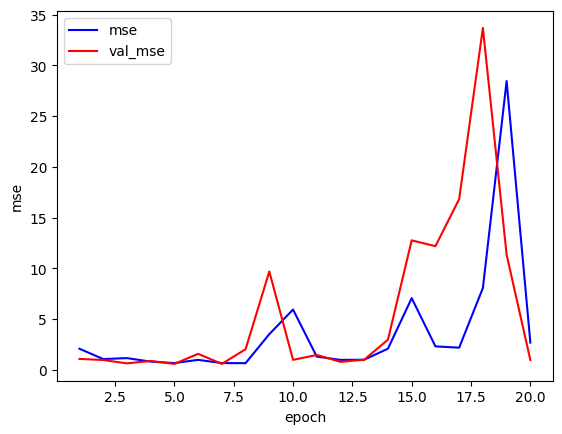

In [9]:
# Function API 2 - 일부 특성은 짧은 경로로 전달, 다른 특성은 깊은 경로로 전달
# 예를 들어 5개(0 ~ 4)는 짧은 경로, 6개의 특성(2 ~ 7)은 깊은 경로로 전달
input_a = Input(shape=[5], name='wide_input')
input_b = Input(shape=[6], name='deep_input')
net1 = Dense(32, activation='relu')(input_b)
net2 = Dense(32, activation='relu')(net1)
concat = Concatenate()([input_a, net2])
output = Dense(1, name='output')(concat)

model3 = Model(inputs=[input_a, input_b], outputs=[output])

model3.compile(optimizer='adam', loss='mse', metrics=['mse'])

# fit()을 호출할 때 하느이 입력행렬 x_train을 전달하는 것이 아니라, 
# 입력마다 하나씩 행렬의 튜플(x_train_a, x_train_b)을 전달해야함
x_train_a, x_train_b, = x_train[:, :5], x_train[:, 2:]
x_valid_a, x_valid_b, = x_valid[:, :5], x_valid[:, 2:]
x_test_a, x_test_b, = x_test[:, :5], x_test[:, 2:] # evaluate용
x_new_a, x_new_b, = x_test_a[:3], x_test_b[:3] # predict용

history3 = model3.fit((x_train_a, x_train_b), y_train, epochs=20, validation_data=((x_valid_a, x_valid_b), y_valid))

print('evalutate3 :', model3.evaluate((x_test_a, x_test_b), y_test, verbose=0))

# test 일부 자료로 예측
y_pred = model3.predict((x_new_a, x_new_b))

print('예측값 :', y_pred.ravel())
print('실제값 :', y_test[:3])

# 시각화
plt.plot(range(1, 21), history3.history['mse'], 'b', label='mse')
plt.plot(range(1, 21), history3.history['val_mse'], 'r', label='val_mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.show()